There are 20 different species of monkeys living in a forest and just a few of them like a specific species of tree that is of special ecological interest.

In the CSV file you have 100 observations over a period of time of the number of each type of monkey and of that special type of tree.
* 

Using a **new** python notebook (so you can practice loading the correct modules)
1. read the CSV file into a Pandas data frame and have a look at it
1. plot the Tree counts
1. plot some of the Monkey counts (just to see what they look like)
1. divide the data into training and test sets
1. use ridge and lasso models (optimizing the hyperparameter) to generate fits
1. examine the coefficients --- which monkeys seem to be eating the tree?
1. compare the coefficients of the ridge and lasso models
1. plot the predicted tree counts (on the y axis) against the measured tree counts (on the x axis) without lines connecting the data points --- if the fit is good you should see a linear trend along the 45-degree line.

In [25]:
import pandas as pd
import numpy as np
from sklearn import model_selection, linear_model

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
monkey = pd.read_csv('monkey.csv')
monkey

,Tree,Monkey00,Monkey01,Monkey02,Monkey03,Monkey04,Monkey05,Monkey06,Monkey07,Monkey08,...,Monkey10,Monkey11,Monkey12,Monkey13,Monkey14,Monkey15,Monkey16,Monkey17,Monkey18,Monkey19
0,21.21,0.00,0.30,0.95,0.28,0.74,0.60,0.00,0.52,0.67,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.44,0.91
1,0.00,0.29,0.92,2.26,0.60,0.98,0.00,0.00,0.42,2.94,...,0.00,0.00,0.00,0.70,0.98,0.00,0.61,0.16,1.78,1.68
2,0.00,1.94,0.00,3.53,0.00,0.92,0.14,0.00,0.24,2.75,...,0.12,0.65,0.00,1.25,1.36,0.00,2.18,0.00,1.42,2.21
3,3.65,0.80,0.39,3.47,0.00,2.77,1.24,0.00,0.00,6.32,...,0.86,0.00,0.41,0.72,1.63,0.43,1.63,0.87,2.19,1.98
4,0.00,1.65,0.75,3.14,0.00,2.29,1.13,0.00,0.68,6.10,...,2.59,2.37,0.57,0.00,0.54,1.44,1.71,0.00,1.67,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,1.34,5.94,16.68,6.97,5.54,6.00,3.75,9.59,12.80,...,4.28,1.13,0.18,1.81,7.57,10.38,17.79,0.99,1.34,3.09
96,0.00,1.58,6.90,16.94,6.76,6.06,6.37,3.12,9.22,11.14,...,3.07,3.19,1.17,2.12,6.76,8.72,19.04,0.00,0.86,3.32
97,0.00,0.07,4.48,19.13,7.14,7.71,5.93,2.55,10.71,11.04,...,2.65,2.75,2.16,3.12,8.03,7.85,21.25,0.00,1.14,2.64
98,131.64,0.00,4.37,20.02,8.08,7.59,5.42,2.25,10.05,10.24,...,0.37,1.95,2.58,4.14,7.38,8.15,20.71,0.55,2.96,2.63


<AxesSubplot:>

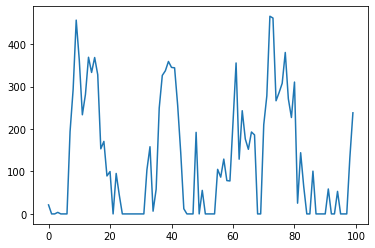

In [18]:
monkey.Tree.plot()

In [19]:
y = monkey.Tree
X = monkey.drop("Tree", axis=1) # Does not include Tree column

In [20]:
y

0      21.21
1       0.00
2       0.00
3       3.65
4       0.00
       ...  
95      0.00
96      0.00
97      0.00
98    131.64
99    238.25
Name: Tree, Length: 100, dtype: float64

In [21]:
X.head()

,Monkey00,Monkey01,Monkey02,Monkey03,Monkey04,Monkey05,Monkey06,Monkey07,Monkey08,Monkey09,Monkey10,Monkey11,Monkey12,Monkey13,Monkey14,Monkey15,Monkey16,Monkey17,Monkey18,Monkey19
0,0.00,0.30,0.95,0.28,0.74,0.60,0.0,0.52,0.67,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.44,0.91
1,0.29,0.92,2.26,0.60,0.98,0.00,0.0,0.42,2.94,0.00,0.00,0.00,0.00,0.70,0.98,0.00,0.61,0.16,1.78,1.68
2,1.94,0.00,3.53,0.00,0.92,0.14,0.0,0.24,2.75,0.00,0.12,0.65,0.00,1.25,1.36,0.00,2.18,0.00,1.42,2.21
3,0.80,0.39,3.47,0.00,2.77,1.24,0.0,0.00,6.32,0.00,0.86,0.00,0.41,0.72,1.63,0.43,1.63,0.87,2.19,1.98
4,1.65,0.75,3.14,0.00,2.29,1.13,0.0,0.68,6.10,0.00,2.59,2.37,0.57,0.00,0.54,1.44,1.71,0.00,1.67,2.85


In [26]:
X_train, X_test, y_train, t_test = model_selection.train_test_split(X, y)

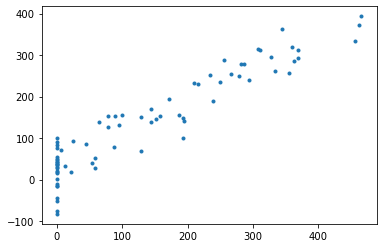

In [31]:
model = linear_model.LassoCV(cv=3) # cross validation
model.fit(X_train, y_train)
ypred = model.predict(X_train)
plt.plot(y_train, ypred, ".")

In [32]:
model.coef_

array([ 40.12090077,   3.43675324,   0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , -25.41491429,   5.26081638,
        17.96196811,  13.40483353,  -9.40448589,  -0.71815532,
        -0.        ,  23.5439084 ,  48.92670378,   0.        ])